# Отток клиентов

# 1. Предобработка данных

### Общая информация по файлу

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
import numpy as np
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [4]:
churn = pd.read_csv('/datasets/Churn.csv')
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


### Предобработка данных

Удалим "лишние" столбцы:

In [6]:
churn = churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Вместо 14 столбцов стало 11. Идём дальше:

Заменим названия столбцов:

In [7]:
churn.set_axis(['credit_score', 'geography', 'gender', 'age', 
                'tenure', 'balance', 'num_of_products', 'has_cr_card', 'is_active_member',
               'estimated_salary', 'exited'],axis = 'columns',inplace = True)

In [8]:
churn

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Теперь посмотрим, какие уникальные значения есть в столбце "tenure":

In [9]:
churn['tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

Посчитаем количество пропусков:

In [10]:
churn['tenure'].isna().sum()

909

Почти 10-я часть. Посчитаем количество клиентов с определенным количеством недвижимости:

In [11]:
churn['tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

Большая часть клиентов имеют 1 недвижимость в собственности. Выглядит вполне логично. Однако пропусков у нас достаточно много. Заполнить более 900 пропусков цифрой 1, как наиболее часто встречающимся значением, не является верным. Также как и заполнение средним или медианой. Поэтому мы можем заполнить пропуски нулями, предположив, что данные по клиентам могли заполняться вручную, а пропуск в столбце "количество недвижимости" говорит о том, что недвижимости у клиента в собственности нет. Довольно частая практика, т.к. возможно, клиент как раз берет кредит на покупку недвижимости. В таком случае заполним пропуски нулями:

In [12]:
churn['tenure'] = churn['tenure'].fillna(0)
churn['tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0.])

Также стоит привести данные столбца к типу int64, т.к. столбец содержит только целые числа:

In [13]:
churn['tenure'].dtype

dtype('float64')

In [14]:
churn['tenure'] = churn['tenure'].astype('int64')
churn['tenure'].dtype

dtype('int64')

In [15]:
churn['tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

Остальные столбцы в изменении типов данных не нуждаются.

### Разделение выборки

В связи с тем, что спрятанной тестовой выборки у нас нет, данные нужно будет разбить на три части: обучающую, валидационную и тестовую. Размеры тестового и валидационного наборов обычно равны. Исходные данные разбивают в соотношении 3:1:1. Разобьем в данной пропорции: обучающая выборка будет 60% от всех данных, валидационная и тестовая - по 20%.

Поскольку нам необходимо будет обучить несколько разных моделей, таких как: логистическая регрессия, случайный лес и дерево решений, подготовка к обучению моделей носит различный характер. Помимо самих данных также к обучению следует подготовить и признаки. Подготовка признаков начинается с преобразования категориальных признаков в численные, однако для разных моделей оно разное. Так, например, для обучения логистической регрессии преобразовать категориальные признаки, имеющиеся в нашем датафрейме, можно с помощью прямого кодирования, тогда как для случайного леса или дерева решений это не подойдет: кодирование должно быть порядковым. Поэтому мы сделаем оба вида кодирования.

Начнем с подготовки признаков для обучения модели логистической регрессии. В этом вопросе нам поможет техника прямого кодирования, или отображения. При этом нам необходимо учитывать дамми-ловушку. Чтобы не попасть в нее, уберём первый столбец вызовом функции pd.get_dummies():

In [16]:
churn_ohe = pd.get_dummies(churn, drop_first=True)
target = churn_ohe['exited']
features = churn_ohe.drop('exited', axis=1)

Теперь разделим датафрейм на 3 части:

In [17]:
features_train, features_valid, target_train, target_valid = \
                                train_test_split(features, target, test_size=0.4, random_state=12345)

features_valid, features_test, target_valid, target_test = \
                                train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)

In [18]:
print('features_train:', features_train.shape)
print('target_train:', target_train.shape)
print('features_valid:', features_valid.shape)
print('target_valid:', target_valid.shape)
print('features_test:', features_test.shape)
print('target_test:', target_test.shape)

features_train: (6000, 11)
target_train: (6000,)
features_valid: (2000, 11)
target_valid: (2000,)
features_test: (2000, 11)
target_test: (2000,)


Теперь разделим выборку для обучения моделей случайный лес и дерево решений. Для подготовки признаков используем метод порядкового кодирования:

In [19]:
churn_ordinal = churn

In [20]:
churn_ordinal[['geography', 'gender']] = OrdinalEncoder().fit_transform(churn_ordinal[['geography', 'gender']])

In [21]:
churn_ordinal

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,0.0,0.0,42,2,0.00,1,1,1,101348.88,1
1,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58,0
2,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57,1
3,699,0.0,0.0,39,1,0.00,2,0,0,93826.63,0
4,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0.0,1.0,39,5,0.00,2,1,0,96270.64,0
9996,516,0.0,1.0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0.0,0.0,36,7,0.00,1,0,1,42085.58,1
9998,772,1.0,1.0,42,3,75075.31,2,1,0,92888.52,1


In [22]:
target_ordinal = churn_ordinal['exited']
features_ordinal = churn_ordinal.drop('exited', axis=1)

In [23]:
features_ordinal_train, features_ordinal_valid, target_ordinal_train, target_ordinal_valid = train_test_split(features_ordinal, target_ordinal, test_size=0.4, random_state=12345)
features_ordinal_valid, features_ordinal_test, target_ordinal_valid, target_ordinal_test = train_test_split(features_ordinal_valid, target_ordinal_valid, test_size=0.5, random_state=12345)

In [24]:
print('features_ordinal_train:', features_ordinal_train.shape)
print('target_ordinal_train:', target_ordinal_train.shape)
print('features_ordinal_valid:', features_ordinal_valid.shape)
print('target_ordinal_valid:', target_ordinal_valid.shape)
print('features_ordinal_test:', features_ordinal_test.shape)
print('target_ordinal_test:', target_ordinal_test.shape)

features_ordinal_train: (6000, 10)
target_ordinal_train: (6000,)
features_ordinal_valid: (2000, 10)
target_ordinal_valid: (2000,)
features_ordinal_test: (2000, 10)
target_ordinal_test: (2000,)


In [25]:
features_ordinal_train

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
7479,567,2.0,1.0,35,8,153137.74,1,1,0,88659.07
3411,711,0.0,0.0,37,8,113899.92,1,0,0,80215.20
6027,850,1.0,1.0,44,3,140393.65,2,0,1,186285.52
1247,512,0.0,1.0,24,6,0.00,2,1,0,37654.31
3716,665,1.0,0.0,27,2,147435.96,1,0,0,187508.06
...,...,...,...,...,...,...,...,...,...,...
4478,549,0.0,1.0,31,4,0.00,2,0,1,25684.85
4094,513,0.0,1.0,29,10,0.00,2,0,1,25514.77
3492,655,0.0,0.0,45,0,57327.04,1,0,1,47349.00
2177,667,0.0,0.0,24,4,0.00,2,0,1,34335.55


Выборка разделена успешно. Выделены признаки и целевой признак для каждой выборки. Учтен объем каждой выборки. В выборке для логистической регрессии количество столбцов увеличилось, а в выборке для обучения других моделей количество столбцов осталось прежним, соответственно, всё сделано корректно.

Для нашего удобства выборку для обучения логистической регрессии обозначим, как выборка ЛР, а выборку для обучения других моделей обозначим, как: СЛ.

### Масштабирование признаков

Следующим шагом нашей предобработки данных станет масштабирование. Перепроверим значения нескольких столбцов, чтобы определить его необходимость:

In [26]:
print(churn['age'].max())
churn['age'].min()

92


18

In [27]:
print(churn['balance'].max())
churn['balance'].min()

250898.09


0.0

In [28]:
print(churn['estimated_salary'].max())
churn['estimated_salary'].min()

199992.48


11.58

Наша проверка показала, что масштабирование необходимо провести, потому как у нас наблюдается перекос в значениях и их разбросе в нашем датафрейме. Так, например, возраст клиентов располагается в интервале от 18 до 92 лет, баланс на счете - в интервале 0 - 250 898.09, а предполагаемая зарплата - в интервале от 11.58 до 199 992.48. Получается, в двух последних столбцах значения и их разбросы больше, поэтому алгоритм автоматически решит, что этот признак важнее возраста, в то время как для нас все признаки являются значимыми.
В этой связи мы масштабируем признаки, т.е. приведем их к одному масштабу. Сделаем это при помощи стандартизации данных:

***Для ЛР:***

In [29]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 
           'has_cr_card', 'is_active_member', 'estimated_salary']

Создадим объект структуры стандартизации данных и настроим его на обучающих данных:

In [30]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Для валидационной выборки:

In [31]:
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
8532,-0.699824,-0.373192,-0.825373,-1.233163,0.830152,0.642466,-1.055187,-0.015173,0,0,0
5799,-0.284431,0.575842,-0.503694,-1.233163,-0.891560,0.642466,0.947699,1.471724,0,0,0
5511,0.151731,-0.657902,-1.468729,0.438711,-0.891560,0.642466,-1.055187,-1.367107,1,0,1
7365,-0.876366,-0.278288,1.748053,1.239884,-0.891560,0.642466,0.947699,-0.786517,0,1,0
7367,-0.481743,0.291132,1.748053,-1.233163,0.830152,0.642466,-1.055187,1.358533,0,1,1


Для тестовой выборки:

In [32]:
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7041,-2.226392,-0.088482,-0.825373,-1.233163,0.830152,0.642466,-1.055187,0.647083,0,0,1
5709,-0.087120,0.006422,1.426375,-1.233163,-0.891560,0.642466,-1.055187,-1.658410,0,0,0
7117,-0.917905,-0.752805,0.139662,0.722307,-0.891560,0.642466,0.947699,-1.369334,0,1,1
7775,-0.253277,0.101325,1.748053,-1.233163,0.830152,0.642466,-1.055187,0.075086,0,1,1
8735,0.785204,-0.847708,1.748053,0.615625,-0.891560,-1.556504,0.947699,-1.070919,0,0,1


Проверим себя:

In [33]:
features_valid.num_of_products.value_counts()

-0.891560    988
 0.830152    939
 2.551864     62
 4.273576     11
Name: num_of_products, dtype: int64

Основная масса в валидационной выборке признаков использует 1 и 2 продукта.

Посмотрим, как обстоят дела с остальными столбцами:

In [34]:
features_valid.has_cr_card.unique()

array([ 0.64246552, -1.55650375])

In [35]:
features_valid.is_active_member.unique()

array([-1.05518729,  0.94769906])

In [36]:
print(features_valid.estimated_salary.min())
features_valid.estimated_salary.max()

-1.7216392430202354


1.740110673099657

In [37]:
print(features_valid.credit_score.min())
features_valid.credit_score.max()

-2.9844832451947942


2.0521518886491803

In [38]:
print(features_valid.age.min())
features_valid.age.max()

-1.9865488817594898


5.036300167567815

Возраст стандартизировался несколько отлично от других: минимальное значение - отрицательное: около -1.986, максимальное - порядка 5.036. Теперь можно смело сказать, что никакие столбцы с крупными значениями не перетянут на себя значимость других признаков.  
Переходим к выборке для СЛ:

***Для СЛ:***

Создадим новый список num:

In [39]:
num = ['credit_score', 'geography', 'gender', 
       'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary']

In [40]:
scaler = StandardScaler()
scaler.fit(features_ordinal_train[num])
features_ordinal_train[num] = scaler.transform(features_ordinal_train[num])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Для валидационной выборки:

In [41]:
features_ordinal_valid[num] = scaler.transform(features_ordinal_valid[num])
features_ordinal_valid.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
8532,-0.699824,-0.900852,-1.102198,-0.373192,-0.825373,-1.233163,0.830152,0.642466,-1.055187,-0.015173
5799,-0.284431,-0.900852,-1.102198,0.575842,-0.503694,-1.233163,-0.891560,0.642466,0.947699,1.471724
5511,0.151731,0.303227,0.907278,-0.657902,-1.468729,0.438711,-0.891560,0.642466,-1.055187,-1.367107
7365,-0.876366,1.507307,-1.102198,-0.278288,1.748053,1.239884,-0.891560,0.642466,0.947699,-0.786517
7367,-0.481743,1.507307,0.907278,0.291132,1.748053,-1.233163,0.830152,0.642466,-1.055187,1.358533


Для тестовой выборки:

In [42]:
features_ordinal_test[num] = scaler.transform(features_ordinal_test[num])
features_ordinal_test.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
7041,-2.226392,-0.900852,0.907278,-0.088482,-0.825373,-1.233163,0.830152,0.642466,-1.055187,0.647083
5709,-0.087120,-0.900852,-1.102198,0.006422,1.426375,-1.233163,-0.891560,0.642466,-1.055187,-1.658410
7117,-0.917905,1.507307,0.907278,-0.752805,0.139662,0.722307,-0.891560,0.642466,0.947699,-1.369334
7775,-0.253277,1.507307,0.907278,0.101325,1.748053,-1.233163,0.830152,0.642466,-1.055187,0.075086
8735,0.785204,-0.900852,0.907278,-0.847708,1.748053,0.615625,-0.891560,-1.556504,0.947699,-1.070919


In [43]:
features_ordinal_valid.num_of_products.value_counts()

-0.891560    988
 0.830152    939
 2.551864     62
 4.273576     11
Name: num_of_products, dtype: int64

В данной выборке разброс получился схожим с ЛР.

In [44]:
features_ordinal_valid.is_active_member.unique()

array([-1.05518729,  0.94769906])

In [45]:
print(features_ordinal_valid.estimated_salary.min())
features_ordinal_valid.estimated_salary.max()

-1.7216392430202354


1.740110673099657

In [46]:
print(features_ordinal_valid.credit_score.min())
features_ordinal_valid.credit_score.max()

-2.9844832451947942


2.0521518886491803

In [47]:
print(features_ordinal_valid.age.min())
features_ordinal_valid.age.max()

-1.9865488817594898


5.036300167567815

In [48]:
features_ordinal_valid.geography.unique() 

array([-0.90085223,  0.30322738,  1.507307  ])

Масштабирование сделали. И в СД признаки уравняли. Теперь можно переходить к исследованию баланса классов.

# 2. Анализ

### Исследуем баланс классов, обучим модели без учёта дисбаланса.

Для начала нам необходимо посмотреть, есть ли несбалансированность классов. Баланс классов наблюдается, если их количество примерно равно. Обучим модель по выборке ***ЛР*** при помощи логистической регрессии и посчитаем долю правильных ответов:

In [49]:
model = LogisticRegression(solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

accuracy_valid = accuracy_score(target_valid, predicted_valid)

accuracy_valid

0.8025

Для ***СЛ*** обучим модель дерева решений:

In [50]:
tree = DecisionTreeClassifier(random_state=12345)
tree.fit(features_ordinal_train, target_ordinal_train)
predicted_ordinal_valid = tree.predict(features_ordinal_valid)
accuracy_ordinal_valid = accuracy_score(target_ordinal_valid, predicted_ordinal_valid.round())
accuracy_ordinal_valid

0.777

У дерева решений результат получился ниже, чем у логистической регрессии. Возможно, если бы мы изменили гиперпараметры и попробовали снова, результат был бы другим.

В любом случае доля правильных ответов достаточно высока, однако нам надо проверить модели на адекватность. Для этого 
подсчитаем классы в целевом признаке, применив метод value_counts():

0    0.7963
1    0.2037
Name: exited, dtype: float64


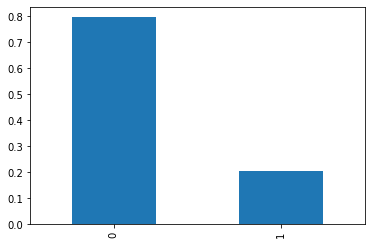

In [51]:
class_frequency = churn['exited'].value_counts(normalize=True)

print(class_frequency)

class_frequency.plot(kind='bar')

Да, дисбаланс на лицо: клиенты, что остались обслуживаться в банке составляют около 80% и "отсеявшиеся" - порядка 20%. Чтобы удостовериться, подходит ли нам метрика accuracy, создадим константную модель: любому объекту она прогнозирует класс «0», как будто клиенты решили остаться в банке:

In [52]:
target_pred_constant = pd.Series([0] * 10000)

print(accuracy_score(target, target_pred_constant))

0.7963


# 3. Устранение дисбаланса

### Улучшим качество модели, учитывая дисбаланс классов. 

Справиться с дисбалансом и более точно классифицировать ответы помогут метрики TP, FP, TN, FN:

Для ***ЛР:***

In [53]:
true_positive = ((target_valid == 1) & (predicted_valid == 1)).sum()
true_positive

99

In [54]:
true_negative = ((target_valid == 0) & (predicted_valid == 0)).sum()
true_negative

1506

In [55]:
false_positive = ((target_valid == 0) & (predicted_valid == 1)).sum()
false_positive

76

In [56]:
false_negative = ((target_valid == 1) & (predicted_valid == 0)).sum()
false_negative

319

Соберем результаты в матрицу ошибок:

In [57]:
confusion_matrix(target_valid, predicted_valid)

array([[1506,   76],
       [ 319,   99]])

319 ложноотрицательных ответов. Второй по величине показатель. Модель достаточно много ответов определяет негативно.

Посмотрим, поможет ли нам полнота и точность. Посчитаем  F1-меру (среднее гармоническое полноты и точности). Поскольку классы мы не сбалансировали, а ложных ответов у нас достаточно, то наверняка F1 будет низким. Проверим:

In [58]:
f1_score(target_valid, predicted_valid)

0.33389544688026984

In [59]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

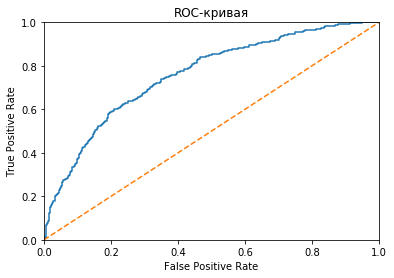

In [60]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.title('ROC-кривая')

plt.show()

И всё же график ROC-кривой выше случайной модели. Чтобы выявить, как сильно наша модель отличается от случайной, посчитаем площадь под ROC-кривой:

In [61]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.7586832124559186

Так мы выявили, что F1 чуть больше 0,33, а AUC-ROC - 0,758. Чтобы модель работала достаточно эффективно, необходимо метрику F1 повысить до 0.59, а AUC-ROC как можно больше приблизить к идеальному значению - к единице.  
А что по ***СЛ***:

In [62]:
true_ordinal_positive = ((target_ordinal_valid == 1) & (predicted_ordinal_valid == 1)).sum()
print('true_ordinal_positive:', true_ordinal_positive)
true_ordinal_negative = ((target_ordinal_valid == 0) & (predicted_ordinal_valid == 0)).sum()
print('true_ordinal_negative:', true_ordinal_negative)
false_ordinal_positive = ((target_ordinal_valid == 0) & (predicted_ordinal_valid == 1)).sum()
print('false_ordinal_positive:', false_ordinal_positive)
false_ordinal_negative = ((target_ordinal_valid == 1) & (predicted_ordinal_valid == 0)).sum()
print('false_ordinal_negative:', false_ordinal_negative)

true_ordinal_positive: 195
true_ordinal_negative: 1359
false_ordinal_positive: 223
false_ordinal_negative: 223


Матрица:

In [63]:
confusion_matrix(target_ordinal_valid, predicted_ordinal_valid)

array([[1359,  223],
       [ 223,  195]])

Здесь ситуация лучше. Истиннопозитивных ответов больше. В то же время ложноотрицательных ответов стало меньше.

F1 и AUC-ROC для ***СЛ***:

In [64]:
f1_score(target_ordinal_valid, predicted_ordinal_valid)

0.4665071770334928

In [65]:
probabilities_ord_valid = tree.predict_proba(features_ordinal_valid)
probabilities_ord_one_valid = probabilities_ord_valid[:, 1]

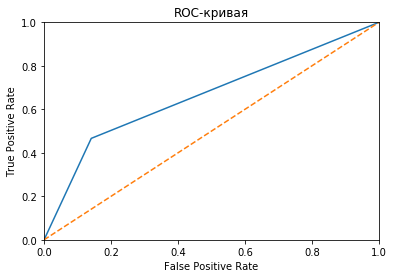

In [66]:
fpr_ord, tpr_ord, thresholds_ord = roc_curve(target_ordinal_valid, probabilities_ord_one_valid)

plt.figure()

plt.plot(fpr_ord, tpr_ord)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.title('ROC-кривая')

plt.show()

In [67]:
auc_roc_ord = roc_auc_score(target_ordinal_valid, probabilities_ord_one_valid)
auc_roc_ord

0.6627731839655453

У дерева решений F1 выше, чем у логистической регрессии, однако показатель AUC-ROC ниже.

Проведем upsampling - увеличение выборки. Для этого выделим несколько этапов:

#### Увеличение выборки:

Создадим функцию, на вход принимающую признаки, целевой признак и количество повторений необходимых нам значений. На выходе мы получим все признаки и целевой признак после увеличения выборки.

In [68]:
def upsample(features, target, repeat):
        
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled = shuffle(pd.concat([features_zeros] + [features_ones] * repeat), random_state=0)
    
    target_upsampled = shuffle(pd.concat([target_zeros] + [target_ones] * repeat), random_state=0)
        
    return features_upsampled, target_upsampled

In [69]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [70]:
features_ordinal_train_upsampled, target_ordinal_train_upsampled = upsample(features_ordinal_train, 
                                                                      target_ordinal_train, 4)

***ЛР:***

In [71]:
features_upsampled

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
8720,0.608663,-1.037515,-1.468729,-1.233163,0.830152,-1.556504,-1.055187,0.098074,0,0,0
4322,-1.499455,-0.752805,1.104696,-0.065285,-0.891560,0.642466,-1.055187,0.524871,0,0,1
3658,0.484045,0.386035,-0.503694,0.067094,-0.891560,0.642466,-1.055187,1.729855,0,0,0
3677,-0.222123,-0.562998,-0.825373,-1.233163,0.830152,0.642466,0.947699,1.017872,0,1,1
9554,1.314830,-0.942612,-0.503694,-0.486339,2.551864,0.642466,-1.055187,0.492591,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2404,-0.222123,-0.183385,1.104696,0.993273,0.830152,-1.556504,-1.055187,0.916626,1,0,1
7841,0.556739,0.670745,0.783018,0.558516,-0.891560,0.642466,0.947699,0.860293,1,0,0
5686,-0.087120,0.670745,0.461340,-1.032577,-0.891560,-1.556504,-1.055187,0.992214,0,1,0
195,1.605605,-0.373192,-0.503694,1.580863,-0.891560,0.642466,0.947699,-1.712801,0,0,1


In [72]:
target_upsampled

8720    0
4322    0
3658    1
3677    0
9554    1
       ..
2404    1
7841    1
5686    1
195     0
7145    0
Name: exited, Length: 9588, dtype: int64

Наша обучающая выборка стала больше практически в 2 раза

И теперь обучим логистическую регрессию:

In [73]:
model_logistic_regression_upsampled = LogisticRegression(solver='liblinear')
model_logistic_regression_upsampled.fit(features_upsampled, target_upsampled)

predicted_valid = model_logistic_regression_upsampled.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))
print("полнота:", recall_score(target_valid, predicted_valid))
print("точность:", precision_score(target_valid, predicted_valid))

F1: 0.4875962360992301
полнота: 0.6818181818181818
точность: 0.3794940079893475


Показатель F1 явно не дотягивает до нужной нам границы. Также показатели полноты и точности низки. Посмотрим, что будет, если мы изменим порог классификации. Найдем значения вероятностей классов для валидационной выборки.

In [74]:
probabilities_valid = model_logistic_regression_upsampled.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
probabilities_one_valid[:8]

array([0.44421704, 0.39326778, 0.51254024, 0.33299676, 0.43143473,
       0.23807358, 0.25838347, 0.22892439])

In [75]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.7633938022852786

Вероятность разнится, причем сильно: где-то она 0,44, а где-то 0,22. Переберем значения порогов от 0 до 0,7 с шагом 0,05 и найдем для каждого точность и полноту:

In [76]:
for threshold in np.arange(0, 0.7, 0.05):
    predicted_validation = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_validation)
    recall = recall_score(target_valid, predicted_validation)
    auc_roc = roc_auc_score(target_valid, predicted_validation)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, AUC-ROC = {:.3f}".format(
        threshold, precision, recall, auc_roc_ord))

Порог = 0.00 | Точность = 0.209, Полнота = 1.000, AUC-ROC = 0.663
Порог = 0.05 | Точность = 0.209, Полнота = 1.000, AUC-ROC = 0.663
Порог = 0.10 | Точность = 0.216, Полнота = 1.000, AUC-ROC = 0.663
Порог = 0.15 | Точность = 0.229, Полнота = 0.990, AUC-ROC = 0.663
Порог = 0.20 | Точность = 0.243, Полнота = 0.969, AUC-ROC = 0.663
Порог = 0.25 | Точность = 0.258, Полнота = 0.935, AUC-ROC = 0.663
Порог = 0.30 | Точность = 0.276, Полнота = 0.904, AUC-ROC = 0.663
Порог = 0.35 | Точность = 0.301, Полнота = 0.868, AUC-ROC = 0.663
Порог = 0.40 | Точность = 0.331, Полнота = 0.818, AUC-ROC = 0.663
Порог = 0.45 | Точность = 0.357, Полнота = 0.756, AUC-ROC = 0.663
Порог = 0.50 | Точность = 0.379, Полнота = 0.682, AUC-ROC = 0.663
Порог = 0.55 | Точность = 0.417, Полнота = 0.629, AUC-ROC = 0.663
Порог = 0.60 | Точность = 0.434, Полнота = 0.562, AUC-ROC = 0.663
Порог = 0.65 | Точность = 0.473, Полнота = 0.483, AUC-ROC = 0.663


Получается, что чем выше порог классификации, тем больше точность и тем меньше полнота. В нашей задаче ключевой метрикой является точность, поэтому возьмем порог в 0,55, тем более, что AUC-ROC при применении данного порога один из самых высоких. 

In [77]:
predicted_valid_upsampled = probabilities_one_valid > 0.55

Установив порог, посмотрим снова на показатели F1, AUC-ROC, точность и полноту нашей логистической регрессии:

In [78]:
print("F1:", f1_score(target_valid, predicted_valid_upsampled))
print("AUC-ROC:", roc_auc_score(target_valid, predicted_valid_upsampled))
print("полнота:", recall_score(target_valid, predicted_valid_upsampled))
print("точность:", precision_score(target_valid, predicted_valid_upsampled))

F1: 0.5014299332697807
AUC-ROC: 0.6982848311446356
полнота: 0.6291866028708134
точность: 0.41679873217115687


AUC-ROC стал меньше, а F1 вырос. Пока модель пока далека от нужных показателей.

Теперь то же самое для ***СЛ***:

In [79]:
features_ordinal_train_upsampled

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
8720,0.608663,-0.900852,-1.102198,-1.037515,-1.468729,-1.233163,0.830152,-1.556504,-1.055187,0.098074
4322,-1.499455,-0.900852,0.907278,-0.752805,1.104696,-0.065285,-0.891560,0.642466,-1.055187,0.524871
3658,0.484045,-0.900852,-1.102198,0.386035,-0.503694,0.067094,-0.891560,0.642466,-1.055187,1.729855
3677,-0.222123,1.507307,0.907278,-0.562998,-0.825373,-1.233163,0.830152,0.642466,0.947699,1.017872
9554,1.314830,-0.900852,-1.102198,-0.942612,-0.503694,-0.486339,2.551864,0.642466,-1.055187,0.492591
...,...,...,...,...,...,...,...,...,...,...
2404,-0.222123,0.303227,0.907278,-0.183385,1.104696,0.993273,0.830152,-1.556504,-1.055187,0.916626
7841,0.556739,0.303227,-1.102198,0.670745,0.783018,0.558516,-0.891560,0.642466,0.947699,0.860293
5686,-0.087120,1.507307,-1.102198,0.670745,0.461340,-1.032577,-0.891560,-1.556504,-1.055187,0.992214
195,1.605605,-0.900852,0.907278,-0.373192,-0.503694,1.580863,-0.891560,0.642466,0.947699,-1.712801


In [80]:
target_ordinal_train_upsampled

8720    0
4322    0
3658    1
3677    0
9554    1
       ..
2404    1
7841    1
5686    1
195     0
7145    0
Name: exited, Length: 9588, dtype: int64

Всё получилось так же как и в ЛР.

И теперь обучим наше дерево решений:

In [81]:
tree_upsampled = DecisionTreeClassifier(random_state=12345)
tree_upsampled.fit(features_ordinal_train_upsampled, target_ordinal_train_upsampled)
predicted_ordinal_valid__upsampled = tree_upsampled.predict(features_ordinal_valid)

print("F1:", f1_score(target_ordinal_valid, predicted_ordinal_valid__upsampled))
print("полнота:", recall_score(target_ordinal_valid, predicted_ordinal_valid__upsampled))
print("точность:", precision_score(target_ordinal_valid, predicted_ordinal_valid__upsampled))

F1: 0.4636251541307029
полнота: 0.44976076555023925
точность: 0.47837150127226463


При увеличении выборки дерево решений показывает результат F1 несколько ниже, чем до этого. Попробуем сдвинуть порог:

In [82]:
probabilities_ordinal_valid_upsampled = tree_upsampled.predict_proba(features_ordinal_valid)
probabilities_ordinal_valid_upsampled = probabilities_ordinal_valid_upsampled[:, 1]
probabilities_ordinal_valid_upsampled[:5]

array([0., 0., 1., 0., 0.])

In [83]:
auc_roc_ord = roc_auc_score(target_ordinal_valid, probabilities_ordinal_valid_upsampled)
auc_roc_ord

0.660088979488141

AUC-ROC также ниже, чем до увеличения выборки. Переберем пороги:

In [84]:
for threshold in np.arange(0, 0.7, 0.05):
    predicted_validation_ordinal_upsampled = probabilities_ordinal_valid_upsampled > threshold
    precision_ordinal_upsampled = precision_score(target_ordinal_valid, predicted_validation_ordinal_upsampled)
    recall_ordinal_upsampled = recall_score(target_ordinal_valid, predicted_validation_ordinal_upsampled)
    auc_roc_ord = roc_auc_score(target_ordinal_valid, predicted_validation_ordinal_upsampled)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, AUC-ROC = {:.3f}".format(
        threshold, precision_ordinal_upsampled, recall_ordinal_upsampled, auc_roc_ord))

Порог = 0.00 | Точность = 0.478, Полнота = 0.450, AUC-ROC = 0.660
Порог = 0.05 | Точность = 0.478, Полнота = 0.450, AUC-ROC = 0.660
Порог = 0.10 | Точность = 0.478, Полнота = 0.450, AUC-ROC = 0.660
Порог = 0.15 | Точность = 0.478, Полнота = 0.450, AUC-ROC = 0.660
Порог = 0.20 | Точность = 0.478, Полнота = 0.450, AUC-ROC = 0.660
Порог = 0.25 | Точность = 0.478, Полнота = 0.450, AUC-ROC = 0.660
Порог = 0.30 | Точность = 0.478, Полнота = 0.450, AUC-ROC = 0.660
Порог = 0.35 | Точность = 0.478, Полнота = 0.450, AUC-ROC = 0.660
Порог = 0.40 | Точность = 0.478, Полнота = 0.450, AUC-ROC = 0.660
Порог = 0.45 | Точность = 0.478, Полнота = 0.450, AUC-ROC = 0.660
Порог = 0.50 | Точность = 0.478, Полнота = 0.450, AUC-ROC = 0.660
Порог = 0.55 | Точность = 0.478, Полнота = 0.450, AUC-ROC = 0.660
Порог = 0.60 | Точность = 0.478, Полнота = 0.450, AUC-ROC = 0.660
Порог = 0.65 | Точность = 0.478, Полнота = 0.450, AUC-ROC = 0.660


Получается, прогнозируемость класса, которая является долей выборок одного и того же класса в листе, при любом пороге будет одинаковой.

В качестве альтернативы увеличению теперь проведем уменьшение выборки:

#### Уменьшение выборки:

Сделаем это техникой downsampling.
Напишем функцию, на вход принимающую признаки, целевой признак и долю отрицательных объектов, которые следует оставить. На выходе мы получим все признаки и целевой признак после уменьшения выборки.

In [85]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

***ЛР:***

In [86]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.20)

In [87]:
features_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2157 entries, 5471 to 9099
Data columns (total 11 columns):
credit_score         2157 non-null float64
age                  2157 non-null float64
tenure               2157 non-null float64
balance              2157 non-null float64
num_of_products      2157 non-null float64
has_cr_card          2157 non-null float64
is_active_member     2157 non-null float64
estimated_salary     2157 non-null float64
geography_Germany    2157 non-null uint8
geography_Spain      2157 non-null uint8
gender_Male          2157 non-null uint8
dtypes: float64(8), uint8(3)
memory usage: 158.0 KB


In [88]:
target_downsampled

5471    1
1280    0
4345    1
2350    1
551     1
       ..
4198    1
8215    1
1892    0
1718    0
9099    0
Name: exited, Length: 2157, dtype: int64

***СЛ:***

In [89]:
features_ordinal_train_downsampled, target_ordinal_train_downsampled = downsample(features_ordinal_train, 
                                                                      target_ordinal_train, 0.20)

In [90]:
features_ordinal_train_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2157 entries, 5471 to 9099
Data columns (total 10 columns):
credit_score        2157 non-null float64
geography           2157 non-null float64
gender              2157 non-null float64
age                 2157 non-null float64
tenure              2157 non-null float64
balance             2157 non-null float64
num_of_products     2157 non-null float64
has_cr_card         2157 non-null float64
is_active_member    2157 non-null float64
estimated_salary    2157 non-null float64
dtypes: float64(10)
memory usage: 185.4 KB


In [91]:
target_ordinal_train_downsampled

5471    1
1280    0
4345    1
2350    1
551     1
       ..
4198    1
8215    1
1892    0
1718    0
9099    0
Name: exited, Length: 2157, dtype: int64

Обучающие выборки уменьшили и перемешали. Получилось по 2157 строк. Обучим теперь логистическую регрессию и дерево решений.

***ЛР:***

In [92]:
model_logistic_regression_downsampled = LogisticRegression(solver='liblinear')
model_logistic_regression_downsampled.fit(features_downsampled, target_downsampled)

predicted_valid = model_logistic_regression_downsampled.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.478395061728395


In [93]:
probabilities_valid = model_logistic_regression_downsampled.predict_proba(features_valid)
probabilities_one_valid_downsampled = probabilities_valid[:, 1]
auc_roc_ord = roc_auc_score(target_valid, probabilities_one_valid_downsampled)
auc_roc_ord

0.7628766203521676

Показатели ниже, чем при увеличении выборки, тем не менее, и тут попробуем сдвинуть порог:

In [94]:
probabilities_one_valid_downsampled[:8]

array([0.44649358, 0.43423888, 0.52631506, 0.41190027, 0.5135944 ,
       0.27806719, 0.2736595 , 0.28541215])

Вот тут уже показатели лучше. В первой восьмерке есть даже 0,52. Сделаем цикл, чтобы найти оптимальный порог классификации:

In [95]:
for threshold in np.arange(0, 0.8, 0.05):
    predicted_validation_downsampled = probabilities_one_valid_downsampled > threshold
    precision_downsampled = precision_score(target_valid, predicted_validation_downsampled)
    recall_downsampled = recall_score(target_valid, predicted_validation_downsampled)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(
        threshold, precision_downsampled, recall_downsampled))
    print("F1:", f1_score(target_valid, predicted_validation_downsampled))
    print("AUC-ROC:", roc_auc_score(target_valid, predicted_validation_downsampled))
    print()

Порог = 0.00 | Точность = 0.209, Полнота = 1.000
F1: 0.3457402812241522
AUC-ROC: 0.5

Порог = 0.05 | Точность = 0.209, Полнота = 1.000
F1: 0.34602649006622516
AUC-ROC: 0.5006321112515804

Порог = 0.10 | Точность = 0.213, Полнота = 1.000
F1: 0.350524109014675
AUC-ROC: 0.5104298356510746

Порог = 0.15 | Точность = 0.221, Полнота = 0.995
F1: 0.3614248479582971
AUC-ROC: 0.5336379968424682

Порог = 0.20 | Точность = 0.233, Полнота = 0.983
F1: 0.3767186067827681
AUC-ROC: 0.564003532564315

Порог = 0.25 | Точность = 0.247, Полнота = 0.957
F1: 0.392349190779794
AUC-ROC: 0.5925649804317713

Порог = 0.30 | Точность = 0.263, Полнота = 0.931
F1: 0.4101212440695835
AUC-ROC: 0.6208103726734374

Порог = 0.35 | Точность = 0.282, Полнота = 0.907
F1: 0.42970521541950113
AUC-ROC: 0.6477234921575863

Порог = 0.40 | Точность = 0.303, Полнота = 0.871
F1: 0.4496602841260036
AUC-ROC: 0.6708681397782469

Порог = 0.45 | Точность = 0.332, Полнота = 0.823
F1: 0.472852233676976
AUC-ROC: 0.6924567049159502

Порог =

Точность, полнота, F1 и AUC-ROC меняются. При пороге в 0,65 F1 достигает максимального значения - 0,5, однако AUC-ROC принимает наивысшее из возможных значение при пороге 0,6. Применим всё же именно этот порог:

In [96]:
predicted_validation_downsampled_probably = probabilities_one_valid_downsampled > 0.60

In [97]:
print("F1:", f1_score(target_valid, predicted_validation_downsampled_probably))
print("полнота:", recall_score(target_valid, predicted_validation_downsampled_probably))
print("точность:", precision_score(target_valid, predicted_validation_downsampled_probably))

F1: 0.49857819905213263
полнота: 0.6291866028708134
точность: 0.41287284144427


In [98]:
auc_roc_ord = roc_auc_score(target_valid, predicted_validation_downsampled_probably)
auc_roc_ord

0.6963884973898947

Результат стал лучше, но всё еще далек от цели. Пойдем дальше.

***СЛ:***

In [99]:
tree_downsampled = DecisionTreeClassifier(random_state=12345)
tree_downsampled.fit(features_ordinal_train_downsampled, target_ordinal_train_downsampled)
predicted_ordinal_valid_downsampled = tree_downsampled.predict(features_ordinal_valid)

print("F1:", f1_score(target_ordinal_valid, predicted_ordinal_valid_downsampled))
print("полнота:", recall_score(target_ordinal_valid, predicted_ordinal_valid_downsampled))
print("точность:", precision_score(target_ordinal_valid, predicted_ordinal_valid_downsampled))

F1: 0.482484076433121
полнота: 0.7248803827751196
точность: 0.3615751789976134


Выше логистической регрессии взять не получилось, однако мы еще не сдвигали порог и не выставляли гиперпараметры. Поэтому для начала проверим: если сдвинем порог, получится ли поднять показатель?

In [100]:
probabilities_valid_ordinal_downsampled = tree_downsampled.predict_proba(features_ordinal_valid)
probabilities_one_valid_ordinal_downsampled = probabilities_valid_ordinal_downsampled[:, 1]
probabilities_one_valid_ordinal_downsampled[:5]

array([1., 1., 1., 0., 0.])

In [101]:
auc_roc_ord = roc_auc_score(target_ordinal_valid, probabilities_one_valid_ordinal_downsampled)
auc_roc_ord

0.6933504315898353

AUC-ROC выше, чем при upsampling. Показатель F1 также выше, чем при увеличении выборки.

In [102]:
for threshold in np.arange(0, 0.7, 0.05):
    predicted_validation_ordinal_downsampled = probabilities_one_valid_ordinal_downsampled > threshold
    precision_ordinal_downsampled = precision_score(target_ordinal_valid, predicted_validation_ordinal_downsampled)
    recall_ordinal_downsampled = recall_score(target_ordinal_valid, predicted_validation_ordinal_downsampled)
    auc_roc_ord = roc_auc_score(target_ordinal_valid, predicted_validation_ordinal_downsampled)
    
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, AUC-ROC = {:.3f}".format(
        threshold, precision_ordinal_downsampled, recall_ordinal_downsampled, auc_roc_ord))
    print("F1:", f1_score(target_ordinal_valid, predicted_validation_ordinal_downsampled))
    print()

Порог = 0.00 | Точность = 0.362, Полнота = 0.725, AUC-ROC = 0.693
F1: 0.482484076433121

Порог = 0.05 | Точность = 0.362, Полнота = 0.725, AUC-ROC = 0.693
F1: 0.482484076433121

Порог = 0.10 | Точность = 0.362, Полнота = 0.725, AUC-ROC = 0.693
F1: 0.482484076433121

Порог = 0.15 | Точность = 0.362, Полнота = 0.725, AUC-ROC = 0.693
F1: 0.482484076433121

Порог = 0.20 | Точность = 0.362, Полнота = 0.725, AUC-ROC = 0.693
F1: 0.482484076433121

Порог = 0.25 | Точность = 0.362, Полнота = 0.725, AUC-ROC = 0.693
F1: 0.482484076433121

Порог = 0.30 | Точность = 0.362, Полнота = 0.725, AUC-ROC = 0.693
F1: 0.482484076433121

Порог = 0.35 | Точность = 0.362, Полнота = 0.725, AUC-ROC = 0.693
F1: 0.482484076433121

Порог = 0.40 | Точность = 0.362, Полнота = 0.725, AUC-ROC = 0.693
F1: 0.482484076433121

Порог = 0.45 | Точность = 0.362, Полнота = 0.725, AUC-ROC = 0.693
F1: 0.482484076433121

Порог = 0.50 | Точность = 0.362, Полнота = 0.725, AUC-ROC = 0.693
F1: 0.482484076433121

Порог = 0.55 | Точнос

В данном случае прогнозируемость вероятности класса также не зависит от порога.

Наши данные снова готовы к обучению. Баланс восстановлен несколькими способами. Посмотрим, какой способ окажется эффективнее.

### Обучим разные модели и найдем лучшую. Кратко опишем выводы.

Поскольку результат при уменьшении выборки лучше, возьмем данные из него и попробуем обучить другие модели. Подберем гиперпараметры для дерева решений:

Начнем с глубины:

In [103]:
for depth in range(1, 11, 1):

    tree_model_downsampled = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    tree_model_downsampled.fit(features_ordinal_train_downsampled, target_ordinal_train_downsampled)
    predicted_ordinal_valid_downsampled = tree_model_downsampled.predict(features_ordinal_valid)
    
        
    print("max_depth {}".format(depth))
    print("F1:", f1_score(target_ordinal_valid, predicted_ordinal_valid_downsampled))
    print("полнота:", recall_score(target_ordinal_valid, predicted_ordinal_valid_downsampled))
    print("точность:", precision_score(target_ordinal_valid, predicted_ordinal_valid_downsampled))
    print()

max_depth 1
F1: 0.4760456273764258
полнота: 0.7488038277511961
точность: 0.34894091415830547

max_depth 2
F1: 0.4921700223713646
полнота: 0.7894736842105263
точность: 0.35752979414951247

max_depth 3
F1: 0.4921700223713646
полнота: 0.7894736842105263
точность: 0.35752979414951247

max_depth 4
F1: 0.5462478184991274
полнота: 0.7488038277511961
точность: 0.42994505494505497

max_depth 5
F1: 0.5283911671924291
полнота: 0.8014354066985646
точность: 0.3941176470588235

max_depth 6
F1: 0.49621785173978816
полнота: 0.784688995215311
точность: 0.36283185840707965

max_depth 7
F1: 0.5152487961476725
полнота: 0.7679425837320574
точность: 0.38768115942028986

max_depth 8
F1: 0.512987012987013
полнота: 0.7559808612440191
точность: 0.3882063882063882

max_depth 9
F1: 0.4974958263772955
полнота: 0.7129186602870813
точность: 0.382051282051282

max_depth 10
F1: 0.5094185094185094
полнота: 0.7440191387559809
точность: 0.38729763387297633



Оптимальная глубина - 4. Посмотрим насчет листьев:

In [104]:
for samples in range(2, 11, 1):

    tree_model_downsampled = DecisionTreeClassifier(max_depth=4, min_samples_split=samples, random_state=12345)
    tree_model_downsampled.fit(features_ordinal_train_downsampled, target_ordinal_train_downsampled)
    predicted_ordinal_valid_downsampled = tree_model_downsampled.predict(features_ordinal_valid)
    
    print("min_samples {}".format(samples))
    print("F1:", f1_score(target_ordinal_valid, predicted_ordinal_valid_downsampled))
    print("полнота:", recall_score(target_ordinal_valid, predicted_ordinal_valid_downsampled))
    print("точность:", precision_score(target_ordinal_valid, predicted_ordinal_valid_downsampled))
    print()

min_samples 2
F1: 0.5462478184991274
полнота: 0.7488038277511961
точность: 0.42994505494505497

min_samples 3
F1: 0.5462478184991274
полнота: 0.7488038277511961
точность: 0.42994505494505497

min_samples 4
F1: 0.5462478184991274
полнота: 0.7488038277511961
точность: 0.42994505494505497

min_samples 5
F1: 0.5462478184991274
полнота: 0.7488038277511961
точность: 0.42994505494505497

min_samples 6
F1: 0.5462478184991274
полнота: 0.7488038277511961
точность: 0.42994505494505497

min_samples 7
F1: 0.5462478184991274
полнота: 0.7488038277511961
точность: 0.42994505494505497

min_samples 8
F1: 0.5462478184991274
полнота: 0.7488038277511961
точность: 0.42994505494505497

min_samples 9
F1: 0.5462478184991274
полнота: 0.7488038277511961
точность: 0.42994505494505497

min_samples 10
F1: 0.5462478184991274
полнота: 0.7488038277511961
точность: 0.42994505494505497



Параметр min_samples_split не повлиял на показатель F1. Получается, 0.546 - это максимальный показатель F1 для данной модели. Посчитаем показатель AUC-ROC:

In [105]:
probabilities_tree_valid = tree_model_downsampled.predict_proba(features_ordinal_valid)
probabilities_one_tree_valid = probabilities_tree_valid[:, 1]
auc_roc_ord = roc_auc_score(target_ordinal_valid, probabilities_one_tree_valid)
auc_roc_ord

0.8139460679050806

Это самый высокий показатель AUC-ROC на данный момент.

Посмотрим на модель **случайного леса**. Обучим ее на уменьшенной выборке (downsampling):

In [106]:
for estim in range(70, 121, 10):
    model_forest = RandomForestClassifier(n_estimators=estim, max_depth=10, random_state=12345)
    model_forest.fit(features_ordinal_train_downsampled, target_ordinal_train_downsampled)
    predicted_ordinal_valid_forest_downsampled = model_forest.predict(features_ordinal_valid)
    
    print("max_estim =", estim, ": ", end='')
    print("F1:", f1_score(target_ordinal_valid, predicted_ordinal_valid_forest_downsampled))  
    print("полнота:", recall_score(target_ordinal_valid, predicted_ordinal_valid_forest_downsampled))
    print("точность:", precision_score(target_ordinal_valid, predicted_ordinal_valid_forest_downsampled))
    print()

max_estim = 70 : F1: 0.5555555555555556
полнота: 0.7655502392344498
точность: 0.4359673024523161

max_estim = 80 : F1: 0.5581395348837209
полнота: 0.7751196172248804
точность: 0.4360699865410498

max_estim = 90 : F1: 0.5567010309278351
полнота: 0.7751196172248804
точность: 0.4343163538873995

max_estim = 100 : F1: 0.5613126079447323
полнота: 0.777511961722488
точность: 0.4391891891891892

max_estim = 110 : F1: 0.5593803786574871
полнота: 0.777511961722488
точность: 0.4368279569892473

max_estim = 120 : F1: 0.5576592082616179
полнота: 0.7751196172248804
точность: 0.43548387096774194



Оптимальное количество деревьев - 100. Посмотрим на глубину.

In [107]:
for depth in range(2, 21, 2):
    model_forest = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=12345)
    model_forest.fit(features_ordinal_train_downsampled, target_ordinal_train_downsampled)
    predicted_ordinal_valid_forest_downsampled = model_forest.predict(features_ordinal_valid)
    print("max_depth =", depth, ": ", end='')
    print("F1:", f1_score(target_ordinal_valid, predicted_ordinal_valid_forest_downsampled))  
    print("полнота:", recall_score(target_ordinal_valid, predicted_ordinal_valid_forest_downsampled))
    print("точность:", precision_score(target_ordinal_valid, predicted_ordinal_valid_forest_downsampled))
    print()

max_depth = 2 : F1: 0.5025792188651438
полнота: 0.8157894736842105
точность: 0.36315228966986157

max_depth = 4 : F1: 0.5447154471544715
полнота: 0.8014354066985646
точность: 0.4125615763546798

max_depth = 6 : F1: 0.566808510638298
полнота: 0.7966507177033493
точность: 0.43989431968295906

max_depth = 8 : F1: 0.5635738831615121
полнота: 0.784688995215311
точность: 0.43967828418230565

max_depth = 10 : F1: 0.5613126079447323
полнота: 0.777511961722488
точность: 0.4391891891891892

max_depth = 12 : F1: 0.5523156089193825
полнота: 0.7703349282296651
точность: 0.4304812834224599

max_depth = 14 : F1: 0.5616438356164384
полнота: 0.784688995215311
точность: 0.43733333333333335

max_depth = 16 : F1: 0.5526537489469251
полнота: 0.784688995215311
точность: 0.4265279583875163

max_depth = 18 : F1: 0.5638389031705227
полнота: 0.7870813397129187
точность: 0.4392523364485981

max_depth = 20 : F1: 0.5623931623931624
полнота: 0.7870813397129187
точность: 0.4375



Лучше всего глубина 6. Посмотрим на минимальное количество выборок, необходимое для разделения внутреннего узла:

In [108]:
for samples in range(5, 13, 1):
    model_forest = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_split=samples, random_state=12345)
    model_forest.fit(features_ordinal_train_downsampled, target_ordinal_train_downsampled)
    predicted_ordinal_valid_forest_downsampled = model_forest.predict(features_ordinal_valid)
    print("min_samples =", samples, ": ", end='')
    print("F1:", f1_score(target_ordinal_valid, predicted_ordinal_valid_forest_downsampled))  
    print("полнота:", recall_score(target_ordinal_valid, predicted_ordinal_valid_forest_downsampled))
    print("точность:", precision_score(target_ordinal_valid, predicted_ordinal_valid_forest_downsampled))
    print()

min_samples = 5 : F1: 0.5709430756159729
полнота: 0.8038277511961722
точность: 0.4426877470355731

min_samples = 6 : F1: 0.5663567202028741
полнота: 0.8014354066985646
точность: 0.43790849673202614

min_samples = 7 : F1: 0.5656223539373412
полнота: 0.7990430622009569
точность: 0.43774574049803405

min_samples = 8 : F1: 0.5658783783783784
полнота: 0.8014354066985646
точность: 0.43733681462140994

min_samples = 9 : F1: 0.5731292517006803
полнота: 0.80622009569378
точность: 0.4445910290237467

min_samples = 10 : F1: 0.5677966101694916
полнота: 0.8014354066985646
точность: 0.43963254593175854

min_samples = 11 : F1: 0.5692567567567567
полнота: 0.80622009569378
точность: 0.43994778067885115

min_samples = 12 : F1: 0.5731191885038038
полнота: 0.8110047846889952
точность: 0.44313725490196076



Оптимальное значение min_samples_split для нас = 9.

Снова обучим модель и попрбуем увеличить порог классификации:

In [109]:
model_forest = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_split=9, random_state=12345)
model_forest.fit(features_ordinal_train_downsampled, target_ordinal_train_downsampled)
predicted_ordinal_valid_forest_downsampled = model_forest.predict(features_ordinal_valid)
print("F1:", f1_score(target_ordinal_valid, predicted_ordinal_valid_forest_downsampled)) 

F1: 0.5731292517006803


In [110]:
probabilities_valid_downsampled_forest = model_forest.predict_proba(features_ordinal_valid)
probabilities_one_valid_downsampled_forest = probabilities_valid_downsampled_forest[:, 1]
probabilities_one_valid_downsampled_forest[:5]

array([0.16337074, 0.66250892, 0.4450456 , 0.44769925, 0.47187452])

In [111]:
auc_roc_ord = roc_auc_score(target_ordinal_valid, probabilities_one_valid_downsampled_forest)
auc_roc_ord

0.8471515675754148

In [112]:
for threshold in np.arange(0.55, 0.71, 0.01):
    predicted_validation_downsampled_forest = probabilities_one_valid_downsampled_forest > threshold
    precision_ordinal_downsampled_forest = precision_score(target_ordinal_valid, predicted_validation_downsampled_forest)
    recall_ordinal_downsampled_forest = recall_score(target_ordinal_valid, predicted_validation_downsampled_forest)
        
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(
        threshold, precision_ordinal_downsampled_forest, recall_ordinal_downsampled_forest))
    print("F1:", f1_score(target_ordinal_valid, predicted_validation_downsampled_forest))
    print("AUC-ROC:", roc_auc_score(target_ordinal_valid, predicted_validation_downsampled_forest))
    print()

Порог = 0.55 | Точность = 0.490, Полнота = 0.756
F1: 0.5945437441204139
AUC-ROC: 0.7740081297370538

Порог = 0.56 | Точность = 0.498, Полнота = 0.744
F1: 0.5969289827255279
AUC-ROC: 0.7730841585056769

Порог = 0.57 | Точность = 0.519, Полнота = 0.732
F1: 0.6071428571428573
AUC-ROC: 0.7762689104095717

Порог = 0.58 | Точность = 0.531, Полнота = 0.715
F1: 0.6095820591233436
AUC-ROC: 0.7742168171837477

Порог = 0.59 | Точность = 0.541, Полнота = 0.694
F1: 0.6079664570230607
AUC-ROC: 0.7691402682087358

Порог = 0.60 | Точность = 0.552, Полнота = 0.675
F1: 0.6071044133476856
AUC-ROC: 0.7649438358567378

Порог = 0.61 | Точность = 0.568, Полнота = 0.660
F1: 0.6106194690265487
AUC-ROC: 0.7637718592539273

Порог = 0.62 | Точность = 0.576, Полнота = 0.644
F1: 0.607909604519774
AUC-ROC: 0.7591913210217822

Порог = 0.63 | Точность = 0.590, Полнота = 0.627
F1: 0.6078886310904873
AUC-ROC: 0.7558750052927976

Порог = 0.64 | Точность = 0.606, Полнота = 0.615
F1: 0.6104513064133018
AUC-ROC: 0.754634978

Мы достигли цели в 0.59. При применении порога = 0.61 наше значение F1 на валидационной выборке составит чуть более 0.610. Применим порог:

In [113]:
model_forest = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_split=9, random_state=12345)

model_forest.fit(features_ordinal_train_downsampled, target_ordinal_train_downsampled)
predicted_validation_downsampled_forest = probabilities_one_valid_downsampled_forest > 0.61
precision_ordinal_downsampled_forest = precision_score(target_ordinal_valid, predicted_validation_downsampled_forest)
recall_ordinal_downsampled_forest = recall_score(target_ordinal_valid, predicted_validation_downsampled_forest)

print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(
    threshold, precision_ordinal_downsampled_forest, recall_ordinal_downsampled_forest))
print("F1:", f1_score(target_ordinal_valid, predicted_validation_downsampled_forest)) 
print("AUC-ROC:", roc_auc_score(target_ordinal_valid, predicted_validation_downsampled_forest))

Порог = 0.70 | Точность = 0.568, Полнота = 0.660
F1: 0.6106194690265487
AUC-ROC: 0.7637718592539273


Наша модель готова. Теперь остается только посмотреть, насколько сильно наша модель отличается от случайной. Для этого проведем кривую ROC, а чтобы облачить наш график в число, тем самы сделав его нагляднее, посчитаем площадь под ROC-кривой — AUC-ROC: 

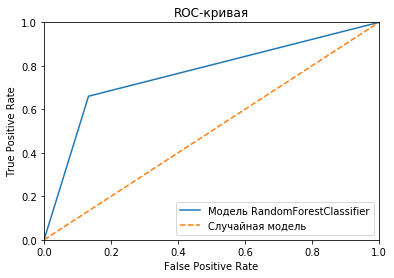

In [114]:
fpr, tpr, thresholds = roc_curve(target_ordinal_valid, predicted_validation_downsampled_forest)
plt.figure()

plt.plot(fpr, tpr, label = 'Модель RandomForestClassifier')

plt.plot([0, 1], [0, 1], linestyle='--', label = 'Случайная модель')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')

plt.legend()

plt.show()

На нашем графике отчетливо видно, что модель RandomForestClassifier располагается выше случайной и имеет бОльшую площадь под своей кривой. Чем график выше, тем больше значение TPR и лучше качество модели, а чтобы выявить, как сильно наша модель отличается от случайной, посчитаем площадь под ROC-кривой — AUC-ROC. Показатель AUC-ROC случайной модели равен 0.5, показатель же нашей модели:

In [115]:
auc_roc = roc_auc_score(target_ordinal_valid, predicted_validation_downsampled_forest)
auc_roc

0.7637718592539273

В идеале показатель auc_roc должен быть равен 1, однако даже значение 0,763 уже неплохой результат. Особенно в сравнении с показателем случайной модели.

Случайный лес, обученный на увеличенной выборке (upsampling):

In [116]:
for estim in range(70, 121, 10):
    model_forest_upsampling = RandomForestClassifier(n_estimators=estim, random_state=12345)
    model_forest_upsampling.fit(features_ordinal_train_upsampled, target_ordinal_train_upsampled)
    predicted_ordinal_valid_forest_upsampled = model_forest_upsampling.predict(features_ordinal_valid)
    
    print("max_estim =", estim, ": ", end='')
    print("F1:", f1_score(target_ordinal_valid, predicted_ordinal_valid_forest_upsampled))  
    print("полнота:", recall_score(target_ordinal_valid, predicted_ordinal_valid_forest_upsampled))
    print("точность:", precision_score(target_ordinal_valid, predicted_ordinal_valid_forest_upsampled))
    print()

max_estim = 70 : F1: 0.5981308411214954
полнота: 0.5358851674641149
точность: 0.676737160120846

max_estim = 80 : F1: 0.5954606141522029
полнота: 0.5334928229665071
точность: 0.6737160120845922

max_estim = 90 : F1: 0.6050870147255689
полнота: 0.5406698564593302
точность: 0.6869300911854104

max_estim = 100 : F1: 0.6040268456375839
полнота: 0.5382775119617225
точность: 0.6880733944954128

max_estim = 110 : F1: 0.6005361930294907
полнота: 0.5358851674641149
точность: 0.6829268292682927

max_estim = 120 : F1: 0.6083445491251683
полнота: 0.5406698564593302
точность: 0.6953846153846154



Возьмем 110 деревьев. Дальше посмотрим глубину:

In [117]:
for depth in range(2, 21, 2):
    model_forest_upsampling = RandomForestClassifier(n_estimators=110, max_depth=depth, random_state=12345)
    model_forest_upsampling.fit(features_ordinal_train_upsampled, target_ordinal_train_upsampled)
    predicted_ordinal_valid_forest_upsampled = model_forest_upsampling.predict(features_ordinal_valid)
    
    print("max_depth =", depth, ": ", end='')
    print("F1:", f1_score(target_ordinal_valid, predicted_ordinal_valid_forest_upsampled))  
    print("полнота:", recall_score(target_ordinal_valid, predicted_ordinal_valid_forest_upsampled))
    print("точность:", precision_score(target_ordinal_valid, predicted_ordinal_valid_forest_upsampled))
    print()

max_depth = 2 : F1: 0.5670498084291188
полнота: 0.7081339712918661
точность: 0.4728434504792332

max_depth = 4 : F1: 0.5978578383641676
полнота: 0.7344497607655502
точность: 0.5041050903119869

max_depth = 6 : F1: 0.6213197969543147
полнота: 0.7320574162679426
точность: 0.5396825396825397

max_depth = 8 : F1: 0.6214807090719499
полнота: 0.7129186602870813
точность: 0.5508317929759704

max_depth = 10 : F1: 0.6136865342163356
полнота: 0.6650717703349283
точность: 0.569672131147541

max_depth = 12 : F1: 0.606714628297362
полнота: 0.6052631578947368
точность: 0.6081730769230769

max_depth = 14 : F1: 0.6113207547169811
полнота: 0.5813397129186603
точность: 0.6445623342175066

max_depth = 16 : F1: 0.6036745406824147
полнота: 0.5502392344497608
точность: 0.6686046511627907

max_depth = 18 : F1: 0.6044678055190538
полнота: 0.5502392344497608
точность: 0.6705539358600583

max_depth = 20 : F1: 0.6055776892430279
полнота: 0.5454545454545454
точность: 0.6805970149253732



Зададим глубину = 8. Количество листьев?

In [118]:
for samples in range(2, 11, 2):
    model_forest_upsampling = RandomForestClassifier(n_estimators=110, max_depth=8, min_samples_split=samples, random_state=12345)
    model_forest_upsampling.fit(features_ordinal_train_upsampled, target_ordinal_train_upsampled)
    predicted_ordinal_valid_forest_upsampled = model_forest_upsampling.predict(features_ordinal_valid)
    
    print("max_samples =", samples, ": ", end='')
    print("F1:", f1_score(target_ordinal_valid, predicted_ordinal_valid_forest_upsampled))  
    print("полнота:", recall_score(target_ordinal_valid, predicted_ordinal_valid_forest_upsampled))
    print("точность:", precision_score(target_ordinal_valid, predicted_ordinal_valid_forest_upsampled))
    print()

max_samples = 2 : F1: 0.6214807090719499
полнота: 0.7129186602870813
точность: 0.5508317929759704

max_samples = 4 : F1: 0.6197478991596639
полнота: 0.7057416267942583
точность: 0.552434456928839

max_samples = 6 : F1: 0.6141078838174273
полнота: 0.7081339712918661
точность: 0.5421245421245421

max_samples = 8 : F1: 0.6086065573770492
полнота: 0.7105263157894737
точность: 0.532258064516129

max_samples = 10 : F1: 0.6080661840744571
полнота: 0.7033492822966507
точность: 0.5355191256830601



Оптимальное значение min_samples_split=2. Мы уже достигли цели в 0.59. Обучим модель и посмотрим, что можно сделать с порогом:

In [119]:
model_forest_upsampling = RandomForestClassifier(n_estimators=110, max_depth=8, random_state=12345)
model_forest_upsampling.fit(features_ordinal_train_upsampled, target_ordinal_train_upsampled)
predicted_ordinal_valid_forest_upsampled = model_forest_upsampling.predict(features_ordinal_valid)

print("F1:", f1_score(target_ordinal_valid, predicted_ordinal_valid_forest_upsampled))  
print("полнота:", recall_score(target_ordinal_valid, predicted_ordinal_valid_forest_upsampled))
print("точность:", precision_score(target_ordinal_valid, predicted_ordinal_valid_forest_upsampled))
print()

F1: 0.6214807090719499
полнота: 0.7129186602870813
точность: 0.5508317929759704



In [120]:
probabilities_valid_upsampled_forest = model_forest_upsampling.predict_proba(features_ordinal_valid)
probabilities_one_valid_upsampled_forest = probabilities_valid_upsampled_forest[:, 1]
probabilities_one_valid_upsampled_forest[:5]

array([0.11123225, 0.66357891, 0.4303839 , 0.27092169, 0.15986377])

In [121]:
auc_roc_ord = roc_auc_score(target_ordinal_valid, probabilities_one_valid_upsampled_forest)
auc_roc_ord

0.8507007663970868

Здесь показатель выше, чем при обучении модели на выборке downsampling.

In [122]:
for threshold in np.arange(0.55, 0.71, 0.01):
    predicted_validation_upsampled_forest = probabilities_one_valid_upsampled_forest > threshold
    precision_ordinal_upsampled_forest = precision_score(target_ordinal_valid, predicted_validation_upsampled_forest)
    recall_ordinal_upsampled_forest = recall_score(target_ordinal_valid, predicted_validation_upsampled_forest)
        
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(
        threshold, precision_ordinal_upsampled_forest, recall_ordinal_upsampled_forest))
    print("F1:", f1_score(target_ordinal_valid, predicted_validation_upsampled_forest))
    print("AUC-ROC:", roc_auc_score(target_ordinal_valid, predicted_validation_upsampled_forest))
    print()

Порог = 0.55 | Точность = 0.602, Полнота = 0.658
F1: 0.6285714285714286
AUC-ROC: 0.7714252445272474

Порог = 0.56 | Точность = 0.614, Полнота = 0.651
F1: 0.6318234610917537
AUC-ROC: 0.7713133396645273

Порог = 0.57 | Точность = 0.628, Полнота = 0.627
F1: 0.6275449101796406
AUC-ROC: 0.7644085071891313

Порог = 0.58 | Точность = 0.639, Полнота = 0.615
F1: 0.626829268292683
AUC-ROC: 0.7615882022030137

Порог = 0.59 | Точность = 0.646, Полнота = 0.598
F1: 0.6211180124223602
AUC-ROC: 0.755743441467708

Порог = 0.60 | Точность = 0.650, Полнота = 0.577
F1: 0.6108998732572878
AUC-ROC: 0.7471902806090044

Порог = 0.61 | Точность = 0.652, Полнота = 0.560
F1: 0.6023166023166023
AUC-ROC: 0.7403973529963281

Порог = 0.62 | Точность = 0.665, Полнота = 0.550
F1: 0.6020942408376964
AUC-ROC: 0.7384571646332243

Порог = 0.63 | Точность = 0.674, Полнота = 0.538
F1: 0.5984042553191489
AUC-ROC: 0.734688692769736

Порог = 0.64 | Точность = 0.687, Полнота = 0.531
F1: 0.5991902834008097
AUC-ROC: 0.73362862102

При применении порога = 0.56 наше значение F1 на валидационной выборке составит порядка 0.632. Применим порог:

In [123]:
model_forest_upsampling = RandomForestClassifier(n_estimators=110, max_depth=8, random_state=12345)
model_forest_upsampling.fit(features_ordinal_train_upsampled, target_ordinal_train_upsampled)
predicted_ordinal_valid_forest_upsampled = probabilities_one_valid_upsampled_forest > 0.56

precision_ordinal_upsampled_forest = precision_score(target_ordinal_valid, predicted_ordinal_valid_forest_upsampled)
recall_ordinal_upsampled_forest = recall_score(target_ordinal_valid, predicted_ordinal_valid_forest_upsampled)

print("Порог = 0.56 | Точность = {:.3f}, Полнота = {:.3f}".format(
    precision_ordinal_upsampled_forest, recall_ordinal_upsampled_forest))
print("F1:", f1_score(target_ordinal_valid, predicted_ordinal_valid_forest_upsampled))
print("AUC-ROC:", roc_auc_score(target_ordinal_valid, predicted_ordinal_valid_forest_upsampled))
print()

Порог = 0.56 | Точность = 0.614, Полнота = 0.651
F1: 0.6318234610917537
AUC-ROC: 0.7713133396645273



И AUC-ROC выше, чем в предыдущей модели, и F1. Нарисуем ROC-кривую:

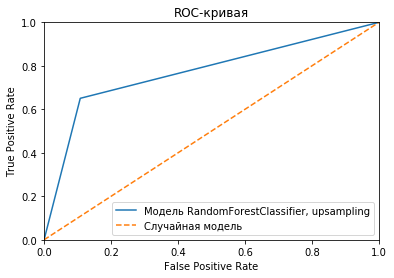

In [124]:
fpr, tpr, thresholds = roc_curve(target_ordinal_valid, predicted_ordinal_valid_forest_upsampled)
plt.figure()

plt.plot(fpr, tpr, label = 'Модель RandomForestClassifier, upsampling')

plt.plot([0, 1], [0, 1], linestyle='--', label = 'Случайная модель')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')

plt.legend()

plt.show()

Можем тестировать нашу модель.

# 4. Тестирование модели

In [125]:
predicted_test = model_forest_upsampling.predict(features_ordinal_test)
print("F1:", f1_score(target_ordinal_test, predicted_test))

F1: 0.5957011258955988


In [126]:
print(recall_score(target_ordinal_test, predicted_test))

0.6879432624113475


In [127]:
print(precision_score(target_ordinal_test, predicted_test))

0.5252707581227437


При максимальном значении F1 = 0.631, достигнутом нами при обучении модели, значение на тестовой выборке составило F1 = 0.595. Модель на тестовой выборке с заданием справилась.